## Phase 2 Project Submission

Please fill out:
* Student name: Nobert Akwir Ogwel
* Student pace: part time
* Scheduled project review date/time: 14/12/2022
* Instructor name: Asha Deen / Rose Delilah / Noah Kandie


## Overview

This project seeks to provide a predictive model, based on King County House Sales dataset, for a real estate agency that helps homeowners(future ones to) buy and/or sell homes. We will also be looking at the relationship between the different attributes in our sales dataset and the selling price itself as the dependent variable.

___

## Business Understanding

The project is going to be to develop a pricing algorithm to help set a target price for houses that are to be bought and/or sold by homeowners through the real estate agency. The goal is to save the real estate agency and prospective/current homeowners some time and to help ensure consistency in pricing of houses in the area.

___

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo.
The description of the column names can be found in column_names.md in the same folder. As with most real world data sets,
the column names are not perfectly described, so we'll have to do some research or use our best judgment if we have questions
about what the data means.

___

## Loading the Data

In the cells below, we load our King County House Sales dataset. Then we set up the dependent and independent variables. We also 
Divide the data into train and test sets.Remember, both of these datasets contain prices,but we are using the test set as a 
stand-in for future house sales, where the price has not yet been determined. 
The model will be trained on just the train set, then we will compare its predictions on the test set to the actual saleprice
on the test set.

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading our dataset
dataset = pd.read_csv('data/kc_house_data.csv')
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
#Due to our novice level on regression modelling, we will drop some of the attributes from the datasets which need more prowess
#in handling the values under them.
dropped = ['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
dataset.drop(dropped, axis=1, inplace=True)
dataset.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1963
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1960
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,2003


In [4]:
#Checking the concise summary of our dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


>**From above summary, we are able to see that all our attributes are of float or integer types. All attributes except for waterfront attribute have no null values.**

In [5]:
#Checking unique values under the waterfront attribute.
dataset['waterfront'].unique()

array([nan,  0.,  1.])

>**From above results, we see that this is a categorical attribute with either value 1 or 0. Therefore, the appropriate way to deal with the null values, would be to replace them with the mode value of the column.** 

In [6]:
#Replacing our null values with the mode and checking the attribute's unique values.
dataset['waterfront'].fillna(dataset['waterfront'].mode()[0], inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


>**We have dealt with all our null values**

## Setting up our dependent and independent variables.

In [8]:
#y will be the dependent variable and x be our independent variable.
independent = dataset.drop('price', axis=1)
dependent = dataset['price']

In [9]:
#our x(idependent) variable.
independent

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,2,1.00,770,10000,1.0,0.0,3,6,1933
3,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [10]:
#our y(dependent) variable.
dependent

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

___

## Dividing our dataset into train and test sets.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=5)

In [12]:
#Looking at the shape of our sets.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17277, 9)
(4320, 9)
(17277,)
(4320,)


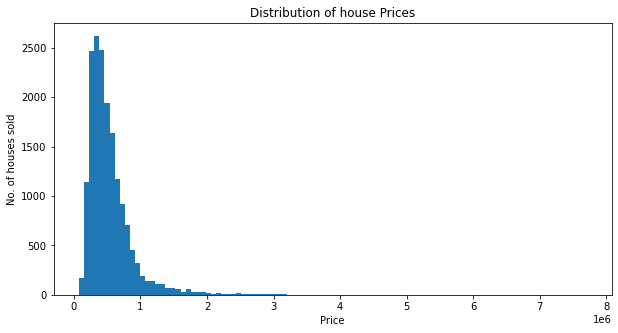

In [13]:
#A simple visualization of our dependent variable.
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Price")
ax.set_ylabel("No. of houses sold")
ax.set_title("Distribution of house Prices");

Above histogram indicates that our dependent variable is positevely skewed. This means that the prices are highly clustered to the lower prices with some few prices(outliers) to the higher prices.

___

## Looking at the correlation of our dependent variables against our independent variable.

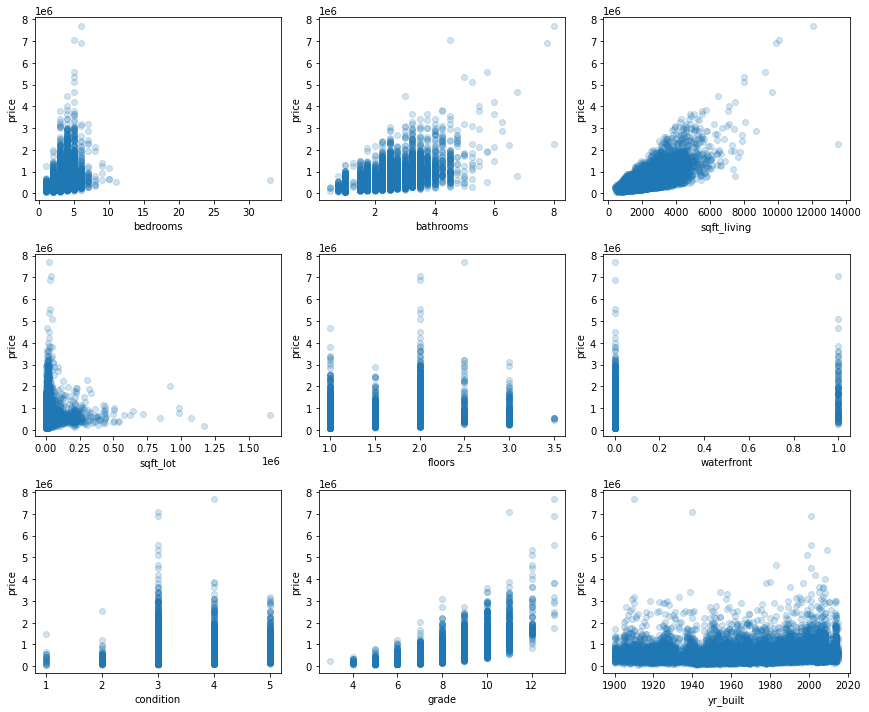

In [14]:
scatterplot_data = x_train

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(x_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

>**From above figure, we are able to see that sqft_living, bathrooms and grade attributes have probably the highest correlation with our indepenedent variable.**

In [15]:
#Correlation matrix of our dataset.
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


___

## Building a model with our three attributes from earlier.

In [16]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [21]:
#Evaluating our model using the cross-validation, using the three highly correlated attributes.
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

model1_scores = cross_validate(
    estimator=model1,
    X=x_train[['sqft_living','bathrooms','grade']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", model1_scores["train_score"].mean())
print("Validation score:", model1_scores["test_score"].mean())

Train score:      0.5363695754845036
Validation score: 0.5285739229447776


>**From above scores, our model seems to be performing well, explaining around 53% of variance most times.It is  also getting nearly identical performance on training subsets compared to the validation subsets, hence no overfitting or underfitting in our model**

___

## Building a model with all our independent numerical attributes.

In [22]:
#Our second model, using all attributes from the independent variable.
model2 = LinearRegression()


model2_scores = cross_validate(
    estimator=model2,
    X=x_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", model2_scores["train_score"].mean())
print("Validation score:", model2_scores["test_score"].mean())

Train score:      0.641737219575862
Validation score: 0.6358036574079289


>**Our model got better score results on both the training data and validation data. This means that this is a better model, compared to our first one.**

___

#### We can use one attribute selection method to check which combination of the independent attributes, is the best for our model

Using the Linear regression model from the statmodels library, can help us gain more statistical overview of our dataset

In [23]:
#Evaluating linear regression model based on the attributes used in our second model using statsmodel
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(x_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3419.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:49:59   Log-Likelihood:            -2.3712e+05
No. Observations:               17277   AIC:                         4.743e+05
Df Residuals:                   17267   BIC:                         4.743e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.766e+06   1.47e+05     46.049      0.000    6.48e+06    7.05e+06
bedrooms    -4.214e+04   2294.948    -18.364      0.000   -4.66e+04   -3.76e+04
bathrooms    5.011e+04   3925.974     12.764      0.000    4.24e+04    5.78e+04
sqft_living   182.0290      3.740     48.671      0.000     174.698     189.360
sqft_lot       -0.2571      0.042     -6.132      0.000      -0.339      -0.175
floors       2.084e+04   3904.756      5.336      0.000    1.32e+04    2.85e+04
waterfront    6.98e+05   2.01e+04     34.701      0.000    6.59e+05    7.37e+05
condition    1.841e+04   2812.217      6.545      0.000    1.29e+04    2.39e+04
grade        1.286e+05   2441.945     52.669      0.000    1.24e+05    1.33e+05
yr_built    -3879.8815     75.537    -51.364      0.000   -4027.942   -3731.821
==============================================================================
Omnibus:                    13245.515   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           953352.673
Skew:                           3.106   Prob(JB):                         0.00
Kurtosis:                      38.857   Cond. No.                     3.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### If we are to select attributes based on their pvalues;

>**From above summary, we see that all our attributes have p-values less than 0.05, hence all our numerical attributes are statistically significant.**

___

## Selecting features with sklearn.feature_selection.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators' accuracy scores or to boost their performance on very high-dimensional datasets. Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.  
Here, basically the sklearn.feature_selection ranks our attributes in terms of importance and leave out the least imporant attribute in relation to the other attributes in our independent attribute.

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(x_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
condition: True
grade: True
yr_built: True


>**So from above results, we also get to see that all attributes are great for our model. This indicates that all coefficients in relation to sais attributes are important to a our model.**

___

We have been able to see that all attributes in our independent variable are good for our final model, and this is based on the two attribute tests and the second model cross validation scores.

## Final Predictive Model.

In [26]:
odel3 = LinearRegression()

# Fitting the model on independent train variable and dependent variable.
model3.fit(x_train, y_train)

# finding the score on the test variables
model3.score(x_test, y_test)

0.6655235261133664

## Finding the mean squared error.

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model3.predict(x_test), squared=False)

209551.7968660023

>**MSE is used to check how close estimates or forecasts are to actual values.Basically, there's no good or bad MSE, but the closer to 0 the better, showing that the model is perfect. For our model, the price forecasts of the houses and the actual value is at 209551.7968660023. Therefore we should really not use our model as the final pricing model but as apredictive model.**

___

## Intepreting our model.

In [31]:
print(pd.Series(model3.coef_, index=x_train.columns, name="Coefficients"))
print()
print("Intercept:", model3.intercept_)

bedrooms       -42144.849922
bathrooms       50109.359950
sqft_living       182.028980
sqft_lot           -0.257080
floors          20835.586811
waterfront     697976.729420
condition       18406.181028
grade          128614.320549
yr_built        -3879.881453
Name: Coefficients, dtype: float64

Intercept: 6765900.901904495


**1. Our Y-intercept, indicates that the base price for a house in King county, with all other dependent attributes at 0, should be 6765900.901904495.**  

**2. For every unit increase in bathrooms, sqft_living, floors, condition and grade, the price of the houses increase by 50109.359950, 182.028980, 20835.586811, 18406.181028, 128614.320549 respectively.**  

**3. Having a waterfront at the house, increases the price of the house by 697976.729420, which shows this is the most expensive aspect of the houses.**  

**4. For every unit increase in bedrooms, footage of the lot(sqft_lot) an year_built, the price of the houses decrease by 42144.849922, 0.257080, 3879.881453 respectively**

___

## Investigating assumptions of linear Regression.

### Linearity

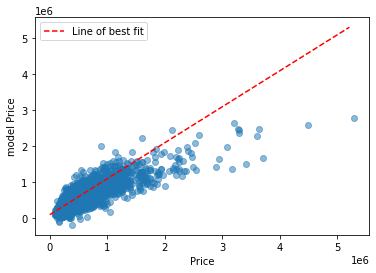

In [36]:
preds = model3.predict(x_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Line of best fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Price")
ax.set_ylabel("model Price")
ax.legend();

>**Most of our points are below our line of best fit hence we are violating linearity to some extent.**

### Normality

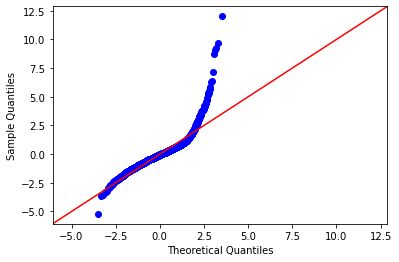

In [43]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

>**Some of our outliers are out of range from our line, but we arent badly off since most of the points are covered.**

### Homoscedacticity

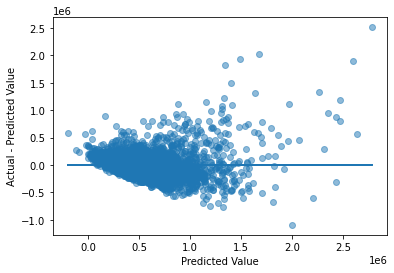

In [35]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

>**from above, we are violating homoscedacticity.**

___

# Conclusion.

Basically, from our little eperiment, we shouldnt really rely on our final model as the final say in pricing the house as we have seen we are violating most of the assumptions of linear regression. This was also seen from our Mean Squared Error value earlier. Therefore, our model should be purposed for predictive purposes only.
We should also work on looking on the outliers in our variable since they are really affecting our model. Though purposely leaving them on since in the real world, this are truly the prices of the houses, but it seems that handling them in a better way may definitely lead to better model.